<a href="https://colab.research.google.com/github/adegoroye25/LaGuardia25/blob/main/Python_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#loading the data#
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [27]:
df

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na


Text(0.5, 1.0, 'Columbia Secondary School VS Other Schools in District 05M ')

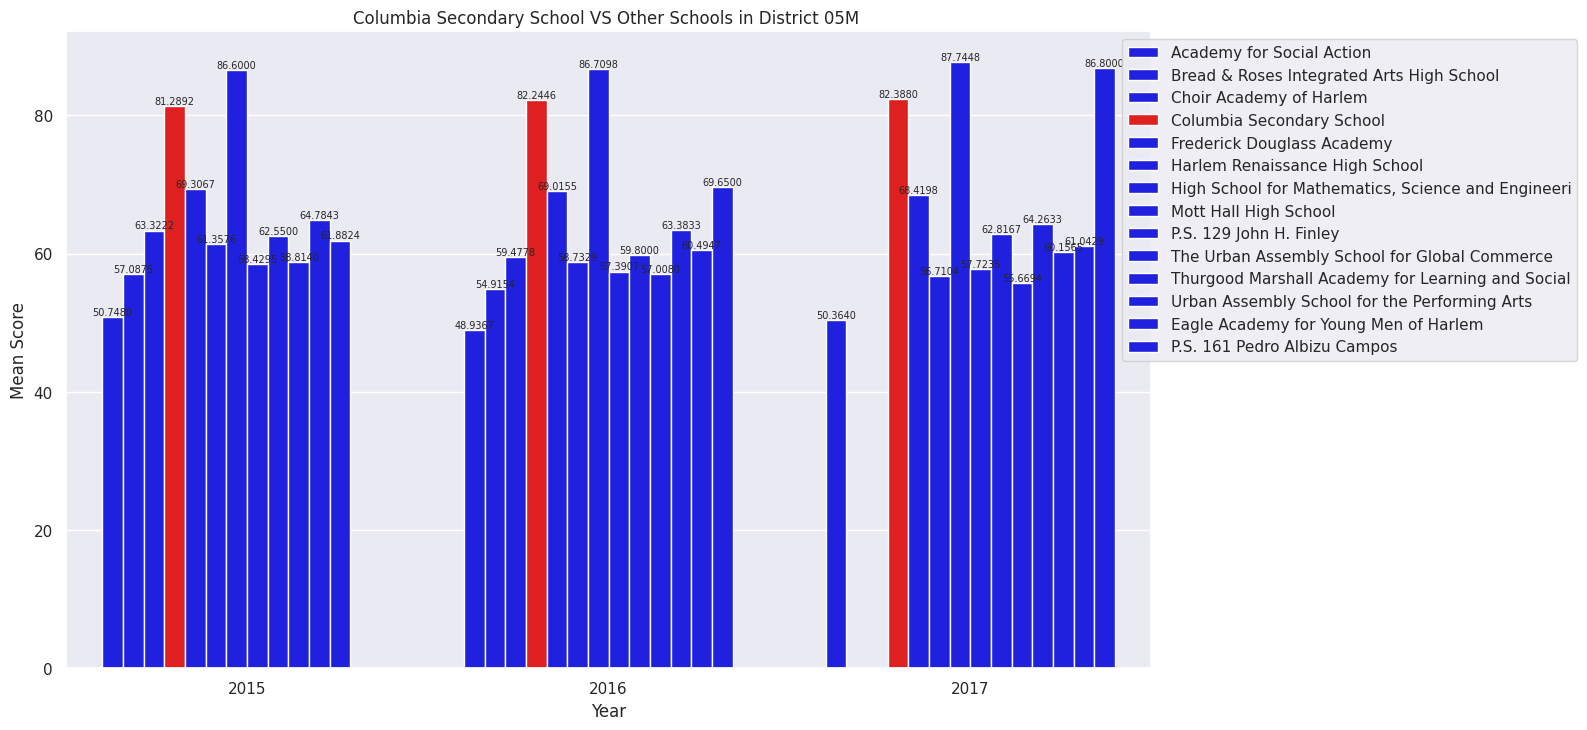

In [22]:
#Data Selection
df['School Name'].unique() #Looking at the list of the different schools
df[df['School Name'] == "Columbia Secondary School"] # Selecting a school (Columbia Secondary School)
adf = df[df["School DBN"].str.contains("05M")] # Selecting a district (05M district)

#Data Cleaning
adf = adf.iloc[:,0:7] #Getting rid of the uneccesary columns with NA Values (Selected Feature: Mean Score)
adf = adf[adf['Mean Score']!= "s"] #Removing the rows with s values in the Mean score column
adf['Mean Score'] = adf['Mean Score'].astype(str).astype(float) #Setting all of the values in the Mean Score as floats not Strings

#Descriptive Statistics
mdf = adf #creating a new dataset based on adf
mdf = mdf.iloc[:,[1,4,6]] #Selecting the relevant datasets
mdf = mdf.groupby(["School Name","Year"]).agg({'Mean Score': 'mean'}) #Aggregating the Mean Score value by the mean and groupinf by School name then year
mdf = mdf.reset_index()
color_mapping = { school: "red" if school == "Columbia Secondary School" else "blue" for school in mdf["School Name"].unique()}
mdf.head(20) #Showing data

#Visualization
ax = sns.barplot(data=mdf, x="Year", y="Mean Score", hue="School Name", palette=color_mapping) #Using Bar plots to see the difference between the schools over the years
sns.set_theme(rc={'figure.figsize':(14,8.27)})
plt.legend(loc='lower right')
plt.setp(ax.get_legend().get_texts(), fontsize='8.0')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.4f', fontsize=7)
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 1))
plt.title("Columbia Secondary School VS Other Schools in District 05M ")





Text(0.5, 1.0, 'All Scoring Subjects in Columbia Secondary School')

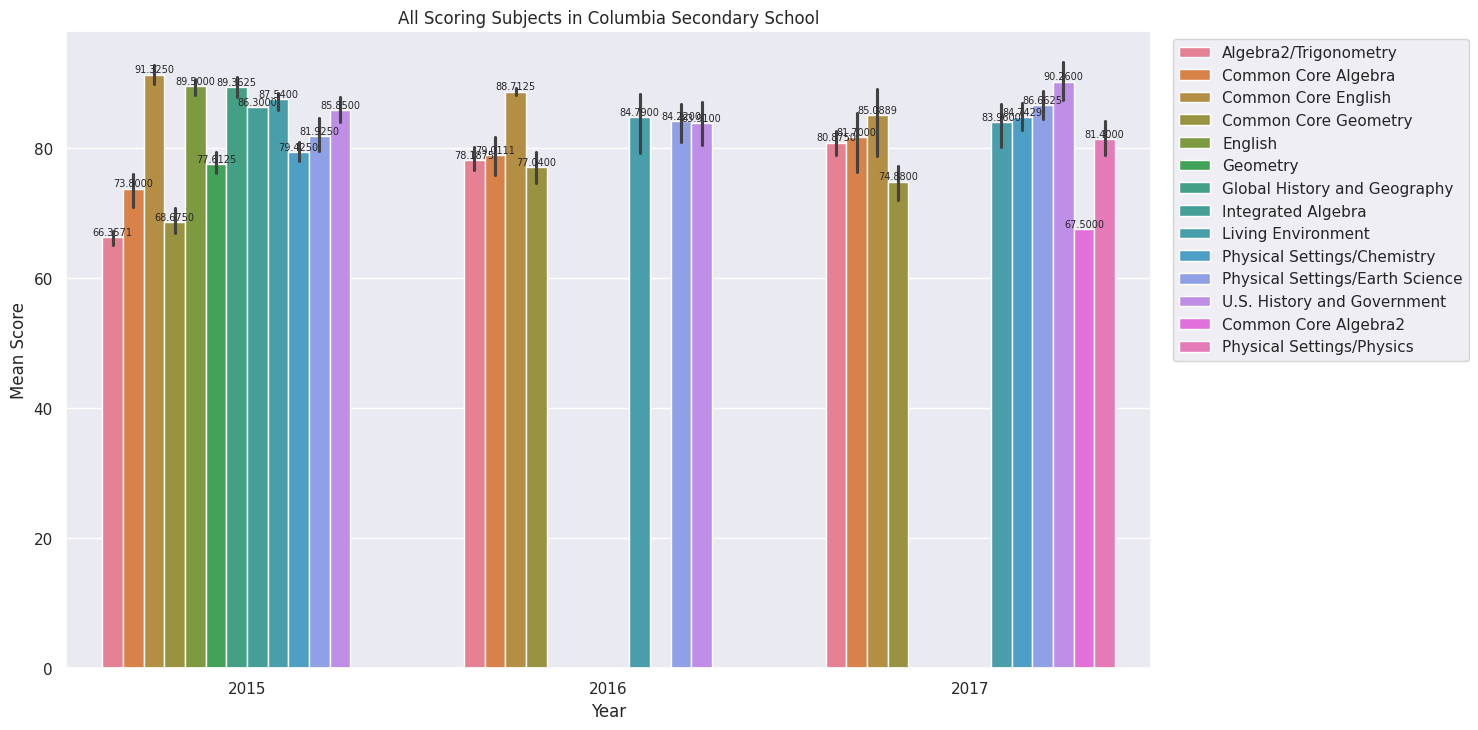

In [23]:
cdf = adf[adf['School Name'] == "Columbia Secondary School"]

ax = sns.barplot(data=cdf, x="Year", y="Mean Score", hue="Regents Exam") #Using Bar plots to see the top subject between the schools over the years
sns.set_theme(rc={'figure.figsize':(14,8.27)})
plt.setp(ax.get_legend().get_texts(), fontsize='7')
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.4f', fontsize=7)
plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))
plt.title("All Scoring Subjects in Columbia Secondary School")

